In [236]:
%reload_ext autoreload
%autoreload 2


import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import unidecode
import sys
sys.path.append(str(Path.cwd().parent))
from settings.params import (DATA_DIR,
                            FILTERS_PARAMS)
from utils import save_data_to_csv

### Read data

In [93]:
def load_data():
    list_dataframe = {}
    for i,filename in enumerate(os.listdir(DATA_DIR)):
        df_name = f"df_{filename.split('.')[0]}"
        if filename.split('.')[-1] == 'csv':
            list_dataframe[df_name] = pd.read_csv(Path(DATA_DIR,filename),sep=',', index_col=[0])
        elif (filename.split('.')[-1] == 'xlsx') or (filename.split('.')[-1] == 'xls'):
            list_dataframe[df_name] = pd.read_excel(Path(DATA_DIR,filename))
        #df_name = f"df_{filename.split('.')[0]}"
        print(filename)
    return list_dataframe

In [94]:
datasets = load_data()

.DS_Store
indicators.csv
CLASS.xlsx
country_codes.csv


In [95]:
datasets.keys()

dict_keys(['df_indicators', 'df_CLASS', 'df_country_codes'])

### Explore Indicators dataframe

In [120]:
if('df_indicators' in list(datasets.keys())):
    df_indicators = datasets['df_indicators']
df_indicators.head()

,country,"ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 ppa) (% de la population)","espérance de vie à la naissance, total (années)","population, total",croissance de la population (% annuel),migration nette,indice du capital humain (échelle comprise entre 0 et 1),pib ($ us courants)current us$constant us$current lcuconstant lcu,pib par habitant ($ us courants)current us$constant us$current lcuconstant lcu,croissance du pib (% annuel),...,accès à l’électricité (% de la population),"retraits annuels d’eau douce, total (% des ressources internes)","production d’électricité à partir de sources d’énergie renouvelables, hors énergie hydroélectrique (% du total)",people using safely managed sanitation services (% of population),homicides intentionnels (pour 100 000 personnes),"dette du gouvernement central, total (% du pib)",statistical performance indicators (spi): overall score (scale 0-100),utilisateurs d internet (% de la population),proportion de sièges occupés par des femmes dans les parlements nationaux (%),"investissements étrangers directs, entrées nettes (% du pib)"
0,Afghanistan,No data available,"61,982",41 128 771,"2,534",-183 672,"0,4","14,58","363,674","-20,7",...,"97,7","43,016",No data available,No data available,"4,022",No data available,"49,756","18,4","27,016","0,141"
1,Africa Eastern and Southern,No data available,"62,455",720 839 314,"2,541",-179 444,No data available,"1,17","1 622,392","3,405",...,"48,104","4,955","2,818",No data available,"10,3",No data available,No data available,"27,661","30,524","4,966"
2,Africa Western and Central,No data available,"56,989",490 330 870,"2,54",-264 802,No data available,"877,86","1 790,349","3,763",...,"54,224","1,698","0,375","24,674","8,1",No data available,No data available,"46,99","19,183","2,421"
3,Afrique du Sud,"20,5","62,341",59 893 885,"0,841",10 934,"0,425","405,87","6 776,48","2,042",...,"89,3","45,335","1,93",No data available,"41,866","75,617","73,475","72,31","46,5","2,169"
4,Albanie,0,"76,463",2 775 634,"-1,29",-10 612,"0,634","18,88","6 802,805","4,844",...,100,"2,922",0,"47,691","2,312","82,384","75,383","79,32","35,714","7,634"


In [97]:
df_indicators.columns

Index(['Country',
       'Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)',
       'Espérance de vie à la naissance, total (années)', 'Population, total',
       'Croissance de la population (% annuel)', 'Migration nette',
       'Indice du capital humain (échelle comprise entre 0 et 1)',
       'PIB ($ US courants)current US$constant US$current LCUconstant LCU',
       'PIB par habitant ($ US courants)current US$constant US$current LCUconstant LCU',
       'Croissance du PIB (% annuel)',
       'Chômage, total (% de la population) (estimation modélisée OIT)',
       'Inflation, prix à la consommation (% annuel)',
       'Envois de fonds des travailleurs et rémunérations des salariés, reçus (% du PIB)',
       'Émissions de CO2 (tonnes métriques par habitant)',
       'Surface forestière (% du territoire)',
       'Accès à l’électricité (% de la population)',
       'Retraits annuels d’eau douce, total (% des ressources internes)',
  

In [98]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 25 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   Country                                                                                                          172 non-null    object
 1   Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)              172 non-null    object
 2   Espérance de vie à la naissance, total (années)                                                                  172 non-null    object
 3   Population, total                                                                                                172 non-null    object
 4   Croissance de la population (% annuel)      

In [99]:
df_indicators.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of Country                                                                                                            object
Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)                object
Espérance de vie à la naissance, total (années)                                                                    object
Population, total                                                                                                  object
Croissance de la population (% annuel)                                                                             object
Migration nette                                                                                                    object
Indice du capital humain (échelle comprise entre 0 et 1)                                                           object
PIB ($ US courants)current US$constant US$current LCUconstant LCU                                     

In [100]:
df_indicators.describe()

,Country,"Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)","Espérance de vie à la naissance, total (années)","Population, total",Croissance de la population (% annuel),Migration nette,Indice du capital humain (échelle comprise entre 0 et 1),PIB ($ US courants)current US$constant US$current LCUconstant LCU,PIB par habitant ($ US courants)current US$constant US$current LCUconstant LCU,Croissance du PIB (% annuel),...,Accès à l’électricité (% de la population),"Retraits annuels d’eau douce, total (% des ressources internes)","Production d’électricité à partir de sources d’énergie renouvelables, hors énergie hydroélectrique (% du total)",People using safely managed sanitation services (% of population),Homicides intentionnels (pour 100 000 personnes),"Dette du gouvernement central, total (% du PIB)",Statistical performance indicators (SPI): Overall score (scale 0-100),Utilisateurs d Internet (% de la population),Proportion de sièges occupés par des femmes dans les parlements nationaux (%),"Investissements étrangers directs, entrées nettes (% du PIB)"
count,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172
unique,172,78,161,165,161,164,116,160,164,161,...,78,138,82,92,143,72,137,158,141,152
top,Afghanistan,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,...,100,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available
freq,1,47,12,8,8,8,41,9,9,10,...,86,34,65,78,28,101,36,12,23,21


In [121]:
print(f"il y'a: {len(df_indicators.select_dtypes('int64').columns)} colonne(s) de type int64");
print(f"Il y'a : {len(df_indicators.select_dtypes('object').columns)} colonne(s) de type object");

il y'a: 0 colonne(s) de type int64
Il y'a : 25 colonne(s) de type object


In [122]:
df_indicators.isna().sum().value_counts()

0    25
dtype: int64

Nettoyage des donnees

In [123]:
df_indicators.columns = df_indicators.columns.str.lower()

In [124]:
# strip countries names
df_indicators['country'] = df_indicators['country'].str.strip()

il considere Data not available comme une donnée, definissons le comme valeur manquante

In [125]:
if "No data available" in df_indicators.values:
    df_indicators = df_indicators.replace(["No data available"], np.nan)

/var/folders/gn/cr4yj18d1tv34pkws9v_kq1r0000gn/T/ipykernel_6944/133471087.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


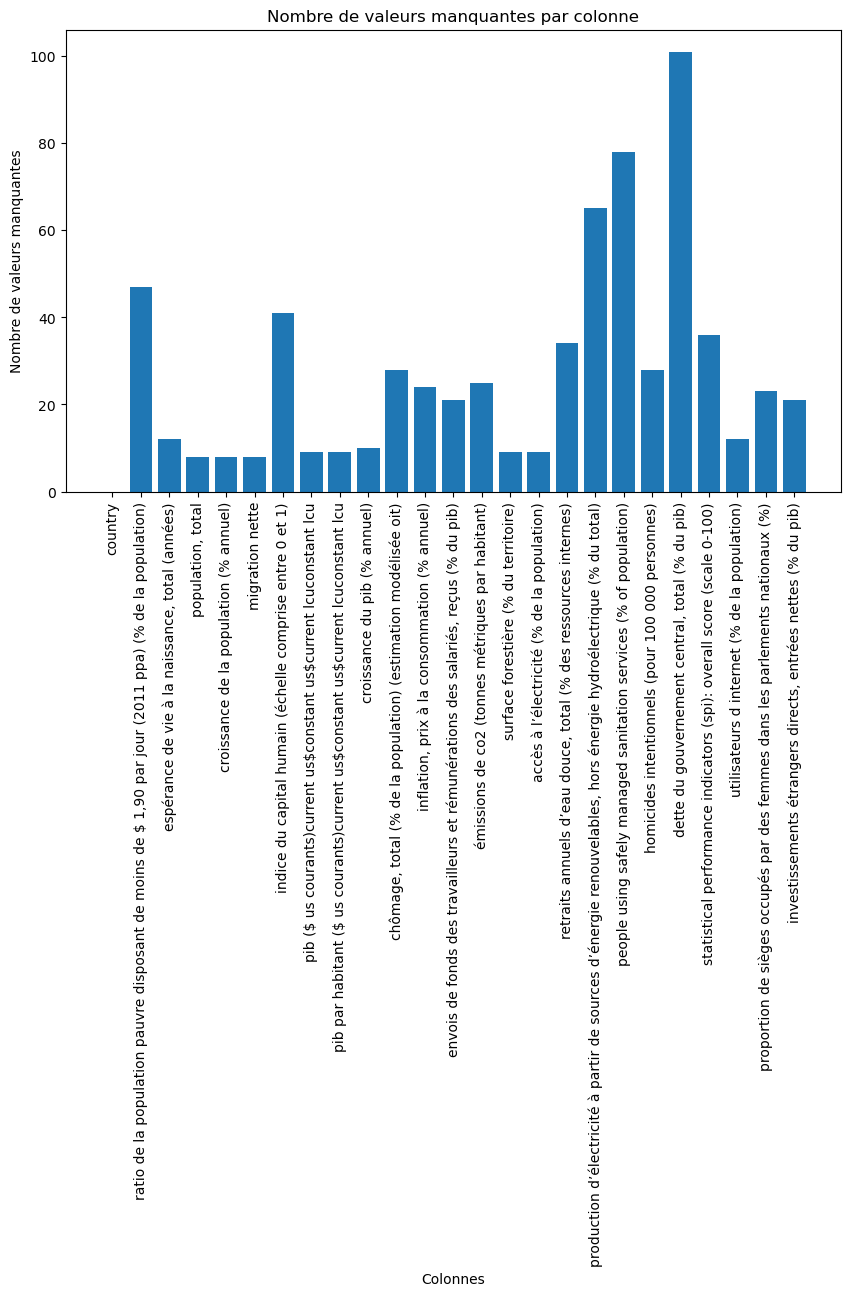

In [131]:
# Créer un graphe pour visualiser le nombre de valeurs manquantes par colonne
plt.figure(figsize=(10, 6))
plt.bar(df_indicators.isnull().sum().index, df_indicators.isnull().sum().values)
plt.xticks(rotation=90)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes par colonne')
plt.tight_layout()
plt.show()

In [132]:
# we observe that numerical values are considerated as str values because of the comma
# Replace the comma with a period and convert the column to float
# let's first remove special caracters
df_indicators = df_indicators.applymap(lambda x: unidecode.unidecode(str(x)))
df_indicators = df_indicators.replace(',', '.', regex=True)

In [133]:
#convert all columns values to numerical type except str columns
columns_to_skip = FILTERS_PARAMS['FEATURES_STR']
for column in df_indicators.select_dtypes(include='object').columns:
    if column not in columns_to_skip:
        df_indicators[column] = df_indicators[column].str.replace(' ', '').astype(float)

Ce traitement a été effectué parce qu'on a remarqué que les valeurs numériques étaient considérées comme des strings

In [134]:
df_indicators.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

Gestion des données manquantes

In [135]:
#cherchons les colonnes dont les valeurs null sont supérieures à 80%
#les colonnes qui ont une valeur qui ne varie pas
#les colonnes qui ont une completude minimum de 0.5
def find_columns_conditions(df):
    total_rows = df.shape[0]
    
    colToDel = [col for col in df.columns if (df[col].isnull().sum() / total_rows) > FILTERS_PARAMS['NAN_TRESHOLD']]
    
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    
    min_completion_cols = [col for col in df.columns if (df[col].count() / total_rows) < FILTERS_PARAMS['MIN_COMPLETION_RATE']]
    
    return colToDel+constant_cols+min_completion_cols

In [136]:
cols_to_del  = find_columns_conditions(df_indicators)

In [137]:
cols_to_del

['dette du gouvernement central, total (%\xa0du pib)']

In [138]:
df_indicators.drop(columns=cols_to_del,axis=1,inplace=True)

In [139]:
len(df_indicators.columns)

24

In [140]:
#pour imputer les données manquantes, on va utiliser la médiane qui est moins sensible aux outliers

df_indicators = df_indicators.fillna(df_indicators.median(numeric_only=True))

In [144]:
df_indicators.isnull().sum().sum()

0

Supprimer les données dupliquées

In [145]:
if len(df_indicators.duplicated().value_counts())>0:
    # Remove duplicate rows
    df_indicators.drop_duplicates(inplace=True)    

Analyser le dataset sur les codes des pays

In [146]:
if('df_country_codes' in list(datasets.keys())):
    df_country_codes = datasets['df_country_codes']
df_country_codes.head()

,id,name,region
0,ABW,Aruba,Amérique latine et Caraïbes
1,AFE,NaN,Agrégats
2,AFG,Afghanistan,Asie du Sud
3,AFR,NaN,Agrégats
4,AFW,NaN,Agrégats


In [147]:
df_country_codes.describe

<bound method NDFrame.describe of       id            name                           region
0    ABW           Aruba      Amérique latine et Caraïbes
1    AFE             NaN                         Agrégats
2    AFG     Afghanistan                      Asie du Sud
3    AFR             NaN                         Agrégats
4    AFW             NaN                         Agrégats
..   ...             ...                              ...
292  XZN             NaN                         Agrégats
293  YEM  Yémen, Rép. du  Afrique du Nord et Moyen-Orient
294  ZAF  Afrique du Sud            Afrique subsaharienne
295  ZMB          Zambie            Afrique subsaharienne
296  ZWE        Zimbabwe            Afrique subsaharienne

[297 rows x 3 columns]>

In [148]:
df_country_codes.shape

(297, 3)

In [149]:
df_country_codes.dtypes

id        object
name      object
region    object
dtype: object

In [150]:
df_country_codes.isna().sum()

id         0
name      32
region     0
dtype: int64

In [151]:
#delete rows with name not define
df_country_codes= df_country_codes.dropna(subset=['name'])

In [152]:
df_country_codes.isna().sum()

id        0
name      0
region    0
dtype: int64

In [153]:
#unidecode value and remove accents
df_country_codes = df_country_codes.applymap(unidecode.unidecode)

In [154]:
df_country_codes

,id,name,region
0,ABW,Aruba,Amerique latine et Caraibes
2,AFG,Afghanistan,Asie du Sud
5,AGO,Angola,Afrique subsaharienne
6,ALB,Albanie,Europe et Asie centrale
7,AND,Andorre,Europe et Asie centrale
...,...,...,...
291,XKX,Kosovo,Europe et Asie centrale
293,YEM,"Yemen, Rep. du",Afrique du Nord et Moyen-Orient
294,ZAF,Afrique du Sud,Afrique subsaharienne
295,ZMB,Zambie,Afrique subsaharienne


In [156]:
if len(df_country_codes.duplicated().value_counts())>0:
    # Remove duplicate rows
    df_country_codes.drop_duplicates(inplace=True)    

In [157]:
df_country_codes.shape

(265, 3)

Analyse du dataset sur les niveaux de vies

In [158]:
if('df_CLASS' in list(datasets.keys())):
    df_CLASS = datasets['df_CLASS']
df_CLASS.head()

,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN


Les colonnes qui nous interesse dans cette base de données sont: le code, la région et le niveau de vie

In [159]:
df_CLASS = df_CLASS[['Code','Region','Income group']]

In [160]:
df_CLASS.columns = df_CLASS.columns.str.lower()

In [161]:
df_CLASS.columns

Index(['code', 'region', 'income group'], dtype='object')

Exploration des données

In [162]:
df_CLASS.shape

(267, 3)

In [163]:
df_CLASS.describe(include="all")

,code,region,income group
count,266,218,217
unique,266,7,4
top,ABW,Europe & Central Asia,High income
freq,1,58,83


In [164]:
df_CLASS.dtypes.unique()

array([dtype('O')], dtype=object)

In [165]:
df_CLASS.isna().sum()

code             1
region          49
income group    50
dtype: int64

Pour l'imputation des données manquantes, on pourra supprimer les lignes qui ont une valeur nulle dans la colonne "region".

Gestion des valeurs manquantes

In [168]:
# Drop rows with missing values in the 'region' column
df_CLASS = df_CLASS.dropna(subset=['region'])

In [169]:
df_CLASS

,code,region,income group
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income
...,...,...,...
213,XKX,Europe & Central Asia,Upper middle income
214,YEM,Middle East & North Africa,Low income
215,ZAF,Sub-Saharan Africa,Upper middle income
216,ZMB,Sub-Saharan Africa,Lower middle income


In [170]:
df_CLASS.isna().sum()

code            0
region          0
income group    1
dtype: int64

Comme il n'ya qu'une seule valeur manquante pour le income group, on peut remplacer par la valeur la plus fréquente

In [172]:
mode_value = df_CLASS['income group'].mode().iloc[0]
# Impute missing values in the specified income group with the mode
df_CLASS['income group'] = df_CLASS['income group'].fillna(mode_value)

In [173]:
df_CLASS.isna().sum().sum()

0

In [175]:
if len(df_CLASS.duplicated().value_counts())>0:
    # Remove duplicate rows
    df_CLASS.drop_duplicates(inplace=True)    

Merger les trois datasets, on ne gardera que les pays pour lesquels on a des indicateurs de développement

In [176]:
df_country_codes.head()

,id,name,region
0,ABW,Aruba,Amerique latine et Caraibes
2,AFG,Afghanistan,Asie du Sud
5,AGO,Angola,Afrique subsaharienne
6,ALB,Albanie,Europe et Asie centrale
7,AND,Andorre,Europe et Asie centrale


In [177]:
df_indicators.head()

,country,"ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 ppa) (% de la population)","espérance de vie à la naissance, total (années)","population, total",croissance de la population (% annuel),migration nette,indice du capital humain (échelle comprise entre 0 et 1),pib ($ us courants)current us$constant us$current lcuconstant lcu,pib par habitant ($ us courants)current us$constant us$current lcuconstant lcu,croissance du pib (% annuel),...,surface forestière (% du territoire),accès à l’électricité (% de la population),"retraits annuels d’eau douce, total (% des ressources internes)","production d’électricité à partir de sources d’énergie renouvelables, hors énergie hydroélectrique (% du total)",people using safely managed sanitation services (% of population),homicides intentionnels (pour 100 000 personnes),statistical performance indicators (spi): overall score (scale 0-100),utilisateurs d internet (% de la population),proportion de sièges occupés par des femmes dans les parlements nationaux (%),"investissements étrangers directs, entrées nettes (% du pib)"
0,Afghanistan,2.8,61.982,41128771.0,2.534,-183672.0,0.400,14.58,363.674,-20.700,...,1.853,97.700,43.016,1.821,59.876,4.022,49.7560,18.400,27.016,0.141
1,Africa Eastern and Southern,2.8,62.455,720839314.0,2.541,-179444.0,0.551,1.17,1622.392,3.405,...,30.174,48.104,4.955,2.818,59.876,10.300,60.9565,27.661,30.524,4.966
2,Africa Western and Central,2.8,56.989,490330870.0,2.540,-264802.0,0.551,877.86,1790.349,3.763,...,19.817,54.224,1.698,0.375,24.674,8.100,60.9565,46.990,19.183,2.421
3,Afrique du Sud,20.5,62.341,59893885.0,0.841,10934.0,0.425,405.87,6776.480,2.042,...,14.055,89.300,45.335,1.930,59.876,41.866,73.4750,72.310,46.500,2.169
4,Albanie,0.0,76.463,2775634.0,-1.290,-10612.0,0.634,18.88,6802.805,4.844,...,28.792,100.000,2.922,0.000,47.691,2.312,75.3830,79.320,35.714,7.634


In [178]:
df_CLASS.head()

,code,region,income group
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [179]:
countries_to_save = df_indicators['country'].tolist()
df_country_codes_matched = df_country_codes[df_country_codes['name'].isin(countries_to_save)]

In [180]:
merged_df_1 = pd.merge(left=df_country_codes, right=df_indicators, left_on='name', right_on='country', how='left')


In [181]:
merged_df_1

,id,name,region,country,"ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 ppa) (% de la population)","espérance de vie à la naissance, total (années)","population, total",croissance de la population (% annuel),migration nette,indice du capital humain (échelle comprise entre 0 et 1),...,surface forestière (% du territoire),accès à l’électricité (% de la population),"retraits annuels d’eau douce, total (% des ressources internes)","production d’électricité à partir de sources d’énergie renouvelables, hors énergie hydroélectrique (% du total)",people using safely managed sanitation services (% of population),homicides intentionnels (pour 100 000 personnes),statistical performance indicators (spi): overall score (scale 0-100),utilisateurs d internet (% de la population),proportion de sièges occupés par des femmes dans les parlements nationaux (%),"investissements étrangers directs, entrées nettes (% du pib)"
0,ABW,Aruba,Amerique latine et Caraibes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Asie du Sud,Afghanistan,2.8,61.982,41128771.0,2.534,-183672.0,0.400,...,1.853,97.700,43.0160,1.821,59.876,4.022,49.7560,18.400,27.016,0.141
2,AGO,Angola,Afrique subsaharienne,Angola,31.1,61.643,35588987.0,3.097,29089.0,0.362,...,53.427,48.224,0.4770,0.000,59.876,4.102,54.9460,32.602,33.636,-5.756
3,ALB,Albanie,Europe et Asie centrale,Albanie,0.0,76.463,2775634.0,-1.290,-10612.0,0.634,...,28.792,100.000,2.9220,0.000,47.691,2.312,75.3830,79.320,35.714,7.634
4,AND,Andorre,Europe et Asie centrale,Andorre,2.8,71.596,79824.0,0.995,1377.0,0.551,...,34.043,100.000,8.4195,1.821,100.000,2.574,60.9565,93.898,46.429,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Kosovo,Europe et Asie centrale,Kosovo,0.4,76.806,1761985.0,-1.356,-15050.0,0.560,...,28.316,100.000,8.4195,0.000,59.876,2.215,60.9565,89.443,26.190,8.606
261,YEM,"Yemen, Rep. du",Afrique du Nord et Moyen-Orient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,ZAF,Afrique du Sud,Afrique subsaharienne,Afrique du Sud,20.5,62.341,59893885.0,0.841,10934.0,0.425,...,14.055,89.300,45.3350,1.930,59.876,41.866,73.4750,72.310,46.500,2.169
263,ZMB,Zambie,Afrique subsaharienne,Zambie,61.4,61.223,20017675.0,2.758,9015.0,0.397,...,60.283,46.685,1.9600,0.000,59.876,5.250,59.0140,21.232,15.060,0.389


On vient de merger le dataset sur les informations basiques de chque pays, à savoir le nom, le code du pays,et la région, avec le dataset sur les indicateurs de développement de ces pays.

On va procéder de même pour merger le dataset résultant avec le dataframe sur les niveaux de vie de chaque pays.

In [182]:
final_dataset = pd.merge(left=merged_df_1, right=df_CLASS[['code','income group']], left_on='id', right_on='code', how='left')

In [183]:
final_dataset.columns.to_list()

['id',
 'name',
 'region',
 'country',
 'ratio de la population pauvre disposant de moins de $\xa01,90 par jour (2011 ppa) (%\xa0de la population)',
 'espérance de vie à la naissance, total (années)',
 'population, total',
 'croissance de la population (%\xa0annuel)',
 'migration nette',
 'indice du capital humain (échelle comprise entre 0 et 1)',
 'pib ($\xa0us courants)current us$constant us$current lcuconstant lcu',
 'pib par habitant ($\xa0us courants)current us$constant us$current lcuconstant lcu',
 'croissance du pib (%\xa0annuel)',
 'chômage, total (%\xa0de la population) (estimation modélisée oit)',
 'inflation, prix à la consommation (%\xa0annuel)',
 'envois de fonds des travailleurs et rémunérations des salariés, reçus (%\xa0du pib)',
 'émissions de co2 (tonnes métriques par habitant)',
 'surface forestière (%\xa0du territoire)',
 'accès à l’électricité (% de la population)',
 'retraits annuels d’eau douce, total (% des ressources internes)',
 'production d’électricité à part

In [184]:
final_dataset.columns = [unidecode.unidecode(col) for col in final_dataset.columns]

On s'est défini certaines colonnes interessantes dans le cadre de l'étude de notre contexte, il s'agit de l'ensemble des données dans FEATURES.

In [203]:
list(FILTERS_PARAMS['FEATURES'].keys())

['id',
 'country',
 'region',
 'population, total',
 'migration nette',
 'croissance du pib (% annuel)',
 'chomage, total (% de la population) (estimation modelisee oit)',
 'inflation, prix a la consommation (% annuel)',
 "acces a l'electricite (% de la population)",
 'indice du capital humain (echelle comprise entre 0 et 1)',
 'income group']

In [204]:
# extract our final columns
final_dataset = final_dataset[FILTERS_PARAMS['FEATURES'].keys()]

In [205]:
final_dataset

,id,country,region,"population, total",migration nette,croissance du pib (% annuel),"chomage, total (% de la population) (estimation modelisee oit)","inflation, prix a la consommation (% annuel)",acces a l'electricite (% de la population),indice du capital humain (echelle comprise entre 0 et 1),income group
1,AFG,Afghanistan,Asie du Sud,41128771.0,-183672.0,-20.700,11.710,2.302,97.700,0.400,Low income
2,AGO,Angola,Afrique subsaharienne,35588987.0,29089.0,3.045,10.209,25.754,48.224,0.362,Lower middle income
3,ALB,Albanie,Europe et Asie centrale,2775634.0,-10612.0,4.844,11.808,6.725,100.000,0.634,Upper middle income
4,AND,Andorre,Europe et Asie centrale,79824.0,1377.0,8.810,5.771,8.005,100.000,0.551,High income
7,ARG,Argentine,Amerique latine et Caraibes,46234830.0,2344.0,5.243,6.491,8.005,100.000,0.602,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...
257,VUT,Vanuatu,Asie de l'Est et Pacifique,326740.0,-197.0,1.849,2.089,2.343,70.043,0.455,Lower middle income
260,XKX,Kosovo,Europe et Asie centrale,1761985.0,-15050.0,3.512,5.771,11.581,100.000,0.560,Upper middle income
262,ZAF,Afrique du Sud,Afrique subsaharienne,59893885.0,10934.0,2.042,29.806,7.040,89.300,0.425,Upper middle income
263,ZMB,Zambie,Afrique subsaharienne,20017675.0,9015.0,4.745,6.131,10.993,46.685,0.397,Lower middle income


imputer les donnees manquantes c'est à dire les données pour lesquelles on a pas pu
récupérer des indicateurs

In [206]:
final_dataset = final_dataset.dropna()

In [207]:
final_dataset

,id,country,region,"population, total",migration nette,croissance du pib (% annuel),"chomage, total (% de la population) (estimation modelisee oit)","inflation, prix a la consommation (% annuel)",acces a l'electricite (% de la population),indice du capital humain (echelle comprise entre 0 et 1),income group
1,AFG,Afghanistan,Asie du Sud,41128771.0,-183672.0,-20.700,11.710,2.302,97.700,0.400,Low income
2,AGO,Angola,Afrique subsaharienne,35588987.0,29089.0,3.045,10.209,25.754,48.224,0.362,Lower middle income
3,ALB,Albanie,Europe et Asie centrale,2775634.0,-10612.0,4.844,11.808,6.725,100.000,0.634,Upper middle income
4,AND,Andorre,Europe et Asie centrale,79824.0,1377.0,8.810,5.771,8.005,100.000,0.551,High income
7,ARG,Argentine,Amerique latine et Caraibes,46234830.0,2344.0,5.243,6.491,8.005,100.000,0.602,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...
257,VUT,Vanuatu,Asie de l'Est et Pacifique,326740.0,-197.0,1.849,2.089,2.343,70.043,0.455,Lower middle income
260,XKX,Kosovo,Europe et Asie centrale,1761985.0,-15050.0,3.512,5.771,11.581,100.000,0.560,Upper middle income
262,ZAF,Afrique du Sud,Afrique subsaharienne,59893885.0,10934.0,2.042,29.806,7.040,89.300,0.425,Upper middle income
263,ZMB,Zambie,Afrique subsaharienne,20017675.0,9015.0,4.745,6.131,10.993,46.685,0.397,Lower middle income


In [208]:
final_dataset.columns

Index(['id', 'country', 'region', 'population, total', 'migration nette',
       'croissance du pib (% annuel)',
       'chomage, total (% de la population) (estimation modelisee oit)',
       'inflation, prix a la consommation (% annuel)',
       'acces a l'electricite (% de la population)',
       'indice du capital humain (echelle comprise entre 0 et 1)',
       'income group'],
      dtype='object')

In [219]:
final_dataset.rename(columns=FILTERS_PARAMS['FEATURES'], inplace=True)

In [220]:
final_dataset.columns.tolist()

['code_pays',
 'pays',
 'region',
 'population_totale',
 'migration nette',
 'croissance annuelle du PIB',
 'pourcentage total de la population au chomage',
 'inflation, prix annuel a la consommation',
 "acces a l'electricite(%population)",
 'indice du capital humain (indice entre 0 et 1)',
 'niveau de vie']

In [222]:
final_dataset.isnull().sum().sum()

0

In [224]:
final_dataset.shape

(154, 11)

In [225]:
final_dataset['niveau de vie'].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [234]:
final_dataset.replace({"niveau de vie": FILTERS_PARAMS['INCOME_MAPPING']}, inplace=True)

In [235]:
final_dataset

,code_pays,pays,region,population_totale,migration nette,croissance annuelle du PIB,pourcentage total de la population au chomage,"inflation, prix annuel a la consommation",acces a l'electricite(%population),indice du capital humain (indice entre 0 et 1),niveau de vie
1,AFG,Afghanistan,Asie du Sud,41128771.0,-183672.0,-20.700,11.710,2.302,97.700,0.400,faible
2,AGO,Angola,Afrique subsaharienne,35588987.0,29089.0,3.045,10.209,25.754,48.224,0.362,moyen
3,ALB,Albanie,Europe et Asie centrale,2775634.0,-10612.0,4.844,11.808,6.725,100.000,0.634,>moyenne
4,AND,Andorre,Europe et Asie centrale,79824.0,1377.0,8.810,5.771,8.005,100.000,0.551,eleve
7,ARG,Argentine,Amerique latine et Caraibes,46234830.0,2344.0,5.243,6.491,8.005,100.000,0.602,>moyenne
...,...,...,...,...,...,...,...,...,...,...,...
257,VUT,Vanuatu,Asie de l'Est et Pacifique,326740.0,-197.0,1.849,2.089,2.343,70.043,0.455,moyen
260,XKX,Kosovo,Europe et Asie centrale,1761985.0,-15050.0,3.512,5.771,11.581,100.000,0.560,>moyenne
262,ZAF,Afrique du Sud,Afrique subsaharienne,59893885.0,10934.0,2.042,29.806,7.040,89.300,0.425,>moyenne
263,ZMB,Zambie,Afrique subsaharienne,20017675.0,9015.0,4.745,6.131,10.993,46.685,0.397,moyen


In [221]:
final_dataset.describe(include="all")

,code_pays,pays,region,population_totale,migration nette,croissance annuelle du PIB,pourcentage total de la population au chomage,"inflation, prix annuel a la consommation",acces a l'electricite(%population),indice du capital humain (indice entre 0 et 1),niveau de vie
count,154,154,154,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154
unique,154,154,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,AFG,Afghanistan,Europe et Asie centrale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income
freq,1,1,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
mean,NaN,NaN,NaN,2.315059e+07,-3967.623377,3.699390,7.413273,13.088786,85.901584,0.550987,NaN
std,NaN,NaN,NaN,4.369123e+07,82446.573682,7.441277,5.549234,25.334205,23.771575,0.123663,NaN
min,NaN,NaN,NaN,1.410000e+00,-525116.000000,-29.681000,0.095000,-4.295000,10.234000,0.300000,NaN
25%,NaN,NaN,NaN,1.254247e+06,-11092.750000,2.368500,3.961750,5.235500,77.019250,0.454250,NaN
50%,NaN,NaN,NaN,6.807820e+06,-878.000000,3.807500,5.771000,8.005000,100.000000,0.551000,NaN
75%,NaN,NaN,NaN,2.615072e+07,1481.250000,5.537500,9.298500,11.564000,100.000000,0.622750,NaN
